#### Importing Qiskit Necessary Libraries

In [1]:
from ibm_quantum_widgets import CircuitComposer      # Circuit Composer module...
from qiskit import QuantumRegister       # Quantum Register formation module, used for defining Qbits...
from qiskit import ClassicalRegister     # Classical Register formation module, used for defining Cbits...
from qiskit import QuantumCircuit     # Quantum Circuit creation module...
from qiskit import Aer             # Aer module for backend system... 
from qiskit import execute      # Execution module for Circuits formed...

In [2]:
Circuit = QuantumCircuit(3, 3)                  # Circuit made of 3 Quantum bits and 3 Classical bits...

In [3]:
import matplotlib.pyplot as plt
from qiskit.visualization import visualize_transition     # Importing Animation Libraries...

#### Designing the Circuit

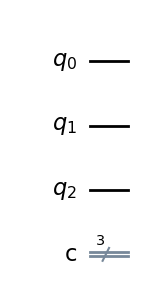

In [4]:
Circuit.draw(output="mpl")      # All Qbits begins in state 0...

Hadamard Gate brings one Qbit from defined state to Superimposition state and vice versa when applied twice.

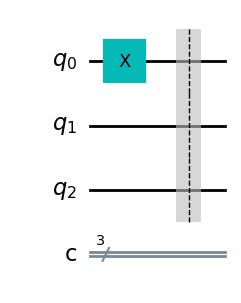

In [5]:
Circuit.x(0)        # Bit flip gate => Pauli X Gate...
Circuit.barrier()    # Barriers for better visualizations...
Circuit.draw()

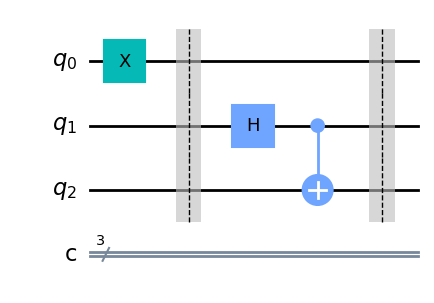

In [6]:
Circuit.h(1)
Circuit.cx(1, 2)  # Entangling Qbits q1 and q2 using Hadamard and Control Negation Gate...
Circuit.barrier()    # Setting up barriers for better visualizations...
Circuit.draw()

When Hadamard and Control Negation Gate is applied to the two Qbits then enter into Quantum Entanglement State.

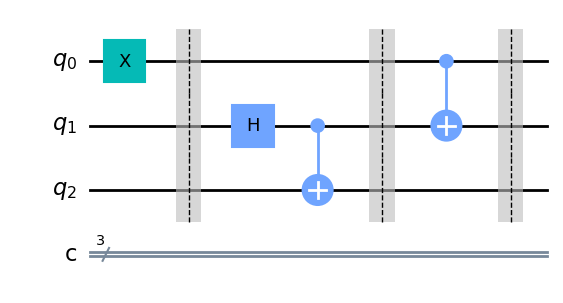

In [7]:
Circuit.cx(0, 1)          # Applying Control Negation to the two Qbits 0 and 1...
Circuit.barrier()
Circuit.draw()

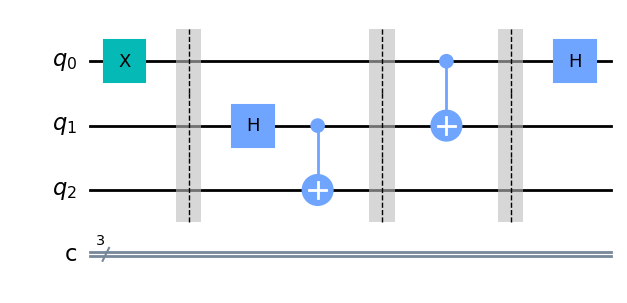

In [8]:
Circuit.h(0)      # Applying Hadamard Gate at the end to make the Qbit 0 into Superposition...
Circuit.draw()

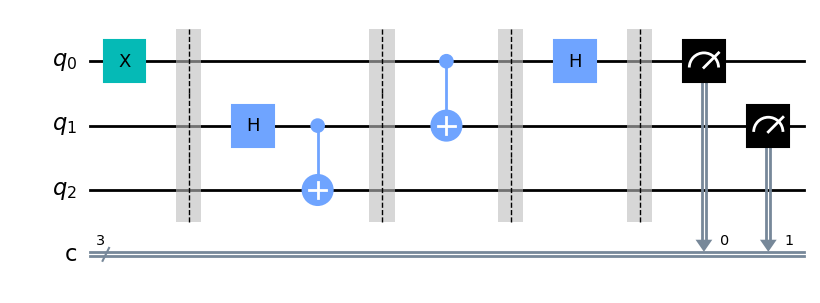

In [9]:
Circuit.barrier()
Circuit.measure([0, 1], [0, 1])            # Measuring Qbits 0 and 1, Storing it in Cbits 0 and 1...
Circuit.draw()

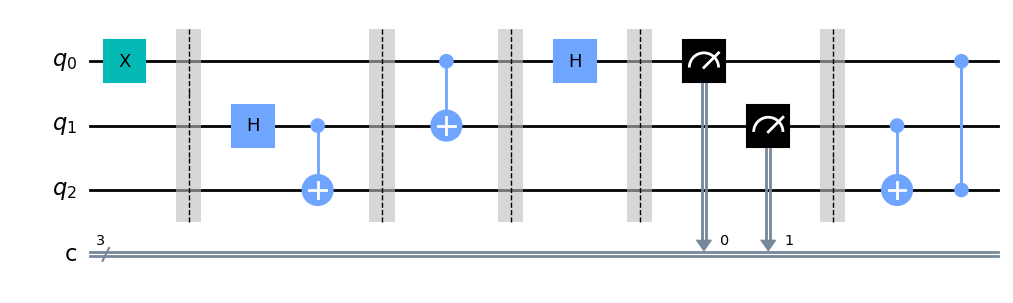

In [10]:
Circuit.barrier()
Circuit.cx(1, 2)     # Applying Control Negation Gate between Qbits 1 and 2...
Circuit.cz(0, 2)     # Applying Pauli Z Gate or Phase Shift Gate between Qbits 0 and 2...
Circuit.draw(output="mpl")

#### Initializing the Simulator

In [11]:
from qiskit import IBMQ     # Saving account credentials via API key...
IBMQ.save_account('7ae584f670e47013d94507c98ad0b26dc28add29bfe1a8ea7989ab9fbcf92f73b3eeb5e76552968ac3939a76bed0bfe204834134b1cf1a4fdf3e7cdf5da8d4fd')

/tmp/ipykernel_199/3804022989.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('7ae584f670e47013d94507c98ad0b26dc28add29bfe1a8ea7989ab9fbcf92f73b3eeb5e76552968ac3939a76bed0bfe204834134b1cf1a4fdf3e7cdf5da8d4fd')
/tmp/ipykernel_199/3804022989.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('7ae584f670e47013d94507c98ad0b26dc28add

In [12]:
IBMQ.load_account()     # Loading account...

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
Provider = IBMQ.get_provider('ibm-q')    # Obtaining the simulation providers...

In [14]:
available_cloud_backends = Provider.backends()     # Simulations list for Cloud server...
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)


Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_jakarta
ibmq_manila
ibm_lagos
ibm_nairobi
ibm_perth
ibm_oslo


In [15]:
available_local_backends = Aer.backends()          # Simulation list for Local Server...
print('\nHere is the list of local backends that are available to you: ')
for i in available_local_backends: print(i)


Here is the list of local backends that are available to you: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


#### Visualization of Results

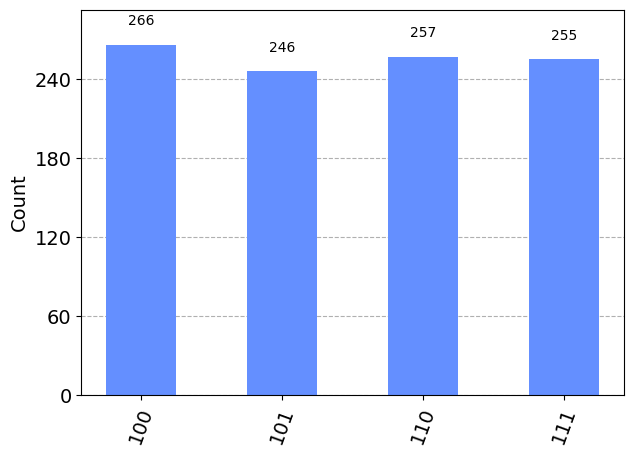

In [16]:
Circuit.measure(2, 2)     # Measuring the Circuit by evaluating Qbit 2 and storing the result in Cbit 2...
Simulator = Aer.get_backend('qasm_simulator')     # Running the Simulator on backend...
result = execute(Circuit, backend=Simulator, shots=1024).result()
Counts = result.get_counts()      # Getting the probability...
from qiskit.tools.visualization import plot_histogram
plot_histogram(Counts)

The Plot shows the values of various instances of the Qbits evaluated and stored in Cbits. The Indices of Bits in every bar represent the Cbits. As an example, 100 means, Cbit 0 has 0, Cbit 1 has 0 and Cbit 2 has 1.

In [17]:
print(Counts)

{'101': 246, '111': 255, '110': 257, '100': 266}
